# <center>${\textbf{Bank Institution Term Deposit Predictive Model}}$</center>

$Business Need$

You successfully finished up to your rigorous job interview process with Bank of Portugal          
as a machine learning researcher. The investment and portfolio department would want    
to be able to identify their customers who potentially would subscribe to their term
deposits. As there has been heightened interest of marketing managers to carefully tune
their directed campaigns to the rigorous selection of contacts, the goal of your employer
is to find a model that can predict which future clients who would subscribe to their term
deposit. Having such an effective predictive model can help increase their campaign 
efficiency as they would be able to identify customers who would subscribe to their
term deposit and thereby direct their marketing efforts to them. This would help them 
better manage their resources (e.g human effort, phone calls, time) 
The Bank of Portugal, therefore, collected a huge amount of data that includes
customers profiles of those who have to subscribe to term deposits and the ones who
did not subscribe to a term deposit. As their newly employed machine learning
researcher, they want you to come up with a robust predictive model that would help
them identify customers who would or would not subscribe to their term deposit in the
future. 
Your main goal as a machine learning researcher is to carry out data exploration, data
cleaning, feature extraction, and developing robust machine learning algorithms that
would aid them in the department. 

${\textbf{Data Description}}$

###### bank client data: 
1 -​  age​  (numeric) 

2 -​ job​ : type of job (categorical: 
'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-emplo
yed','services','student','technician','unemployed','unknown') 

3 - ​ marital ​ : marital status (categorical: 'divorced','married','single','unknown'; note: 
'divorced' means divorced or widowed) 

4 - ​ education (categorical)​: 
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.
degree','unknown') <br>
5 - ​default:​  has credit in default? (categorical: 'no','yes','unknown') <br>
6 -​  housing:​  has housing loan? (categorical: 'no','yes','unknown') <br>
7 - ​loan:​ has personal loan? (categorical: 'no','yes','unknown') <br>
###### related with the last contact of the current campaign: 
8 - ​ contact:​  contact communication type (categorical: 'cellular','telephone') <br>
9 -​  month:​  last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
10 - ​ day_of_week​: last contact day of the week (categorical: 
'mon','tue','wed','thu','fri') <br>
11 - ​duration​ : last contact duration, in seconds (numeric). Important note: this 
attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the 
duration is not known before a call is performed. Also, after the end of the call y is 
obviously known. Thus, this input should only be included for benchmark 
purposes and should be discarded if the intention is to have a realistic predictive 
model. <br>
###### other attributes: 
 
12 - ​campaign:​ number of contacts performed during this campaign and for this 
client (numeric, includes last contact) <br>
13 - ​pdays:​  number of days that passed by after the client was last contacted 
from a previous campaign (numeric; 999 means client was not previously 
contacted) <br>
14 - ​previous:​  number of contacts performed before this campaign and for this 
client (numeric) <br>
15 - ​ poutcome​ : outcome of the previous marketing campaign (categorical: 
'failure','nonexistent','success') <br>
###### social and economic context attributes 
16 -​ emp.var.rate:​  employment variation rate - quarterly indicator (numeric) <br>
17 - ​ cons.price.idx:​ consumer price index - monthly indicator (numeric) <br>
18 -​ cons.conf.idx:​ consumer confidence index - monthly indicator (numeric) <br>
19 - ​euribor3m:​  euribor 3 month rate - daily indicator (numeric) <br>
20 -​ nr.employed: ​ number of employees - quarterly indicator (numeric) <br>
##### Output variable (desired target): 
21 - ​y​  - has the client subscribed to a term deposit? (binary: 'yes','no') 

${\textbf{Import Libraries}}$

In [160]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices
import numpy as np
import pandas as pd


# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Modelling Helpers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import display

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


# Configure visualisations
%matplotlib inline
mpl.style.use( 'fivethirtyeight' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 18 , 8

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
# read in the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## ${\textbf{Task 1 - Exploratory Data Analysis  }}$

> ## ${\textbf{Task 1.1 - Visualization using Tableau  }}$

>> ${\textbf{Univariate Analysis}}$

**A class for Proper Data Visualization**

In [95]:
class DataVisualizer:
    """
    A Data Visualizer class that explains each feature in a data for training, feature genearation
     and prediction
    plot chart function bar chart to show distribution and how it spread()
    
    """
    def __init__(self, data):
        self.data = data 
        print('Initializing Data......')
        
        
        
    def plot_chart(self, data, x_axis, y_axis, hue_column, legend=None):
        """
        Plot a bar plot to show distribution of values in x_axis
        x_axis : column to compare
        y_axis : values to see distribution

        return : barplot and a boxplot that is hued by dayofweek
        """
        plt.figure(figsize=(20, 9))
        sns.barplot(x=x_axis, y=y_axis, data=data ,hue=hue_column,)
        plt.title(f'Distribution of {y_axis} per {hue_column} for each {x_axis}', size=35); 
        plt.yticks(fontsize=25); plt.xticks(fontsize=25)    
        plt.legend(labels = legend, bbox_to_anchor=(1, 1.02), fontsize=20)

    def plot_box(self, data, x, y):
        """
        Plot a box plot to show distribution of values in x_axis
        x_axis : column to compare
        y_axis : values to see distribution

        return : barplot and a boxplot that is hued by dayofweek
        """
        plt.figure(figsize=(20, 9))
        sns.boxplot(x=x, y=y, data=data, orient='v')
        plt.title(f'Distribution of {y}  for each {x}', size=35, fontweight='bold'); 
        plt.yticks(fontsize=20); plt.xticks(fontsize=20)    
        plt.ylabel(f'{y}', fontsize=24);    plt.xlabel(f'{x}', fontsize=24)
        plt.legend(bbox_to_anchor=(1, 1.02), fontsize=20)
        plt.show()

    def plot_crosstab(self, data, column, target):
        """
        Plot a box plot to show distribution of values in x_axis
        x_axis : column to compare
        y_axis : values to see distribution

        return : barplot and a boxplot that is hued by dayofweek
        """
        cross = pd.crosstab(data[target], data[column])
        cross.plot(kind='bar', )
        plt.xlabel('values', fontsize=24)
        plt.ylabel('Frequency', fontsize=24)    
        plt.title(f'Relationship of {target} with {column} Feature', size=35)
        plt.xticks(rotation=0, fontsize=18)
        plt.yticks(fontsize=18)   
        plt.legend(fontsize=15)
        plt.show()

    def plot_hist(self, data, column):
        """
        Plot a box plot to show distribution of values in x_axis
        x_axis : column to compare
        y_axis : values to see distribution

        return : barplot and a boxplot that is hued by dayofweek
        """
        data[column].plot(kind='hist')
        plt.xlabel('values', fontsize=24)
        plt.ylabel('Frequency', fontsize=24)    
        plt.title(f'Distribution of {column}', size=35)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)    
        
    def plot_scatter(self, data, x, y):
        """
        Plot a scatter plot to show relationship/correlation in x and y
        x : continuous feature
        y_axis : continous feature

        return : barplot and a boxplot that is hued by dayofweek
        """
        plt.figure(figsize=(20, 9))
        sns.scatterplot(data=data, x=x, y=y, hue='y')
        plt.title(f'Relationship of {y} and {x} separated by term deposit', size=35, fontweight='bold'); 
        plt.yticks(fontsize=20); plt.xticks(fontsize=20)    
        plt.ylabel(f'{y}', fontsize=24);    plt.xlabel(f'{x}', fontsize=24)
        plt.legend(bbox_to_anchor=(1, 1.02), fontsize=20)
        plt.show()

Initializing Data......


No handles with labels found to put in legend.


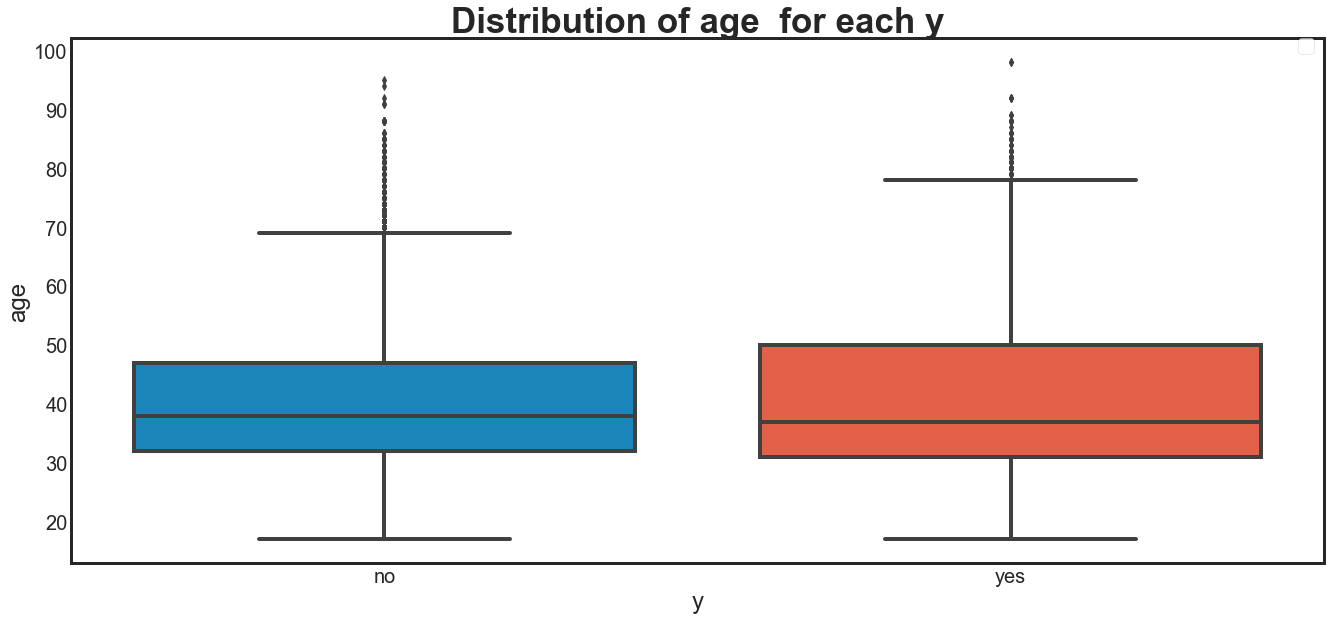

In [96]:
viz = DataVisualizer(df)
viz.plot_box(df, x='y', y='age')

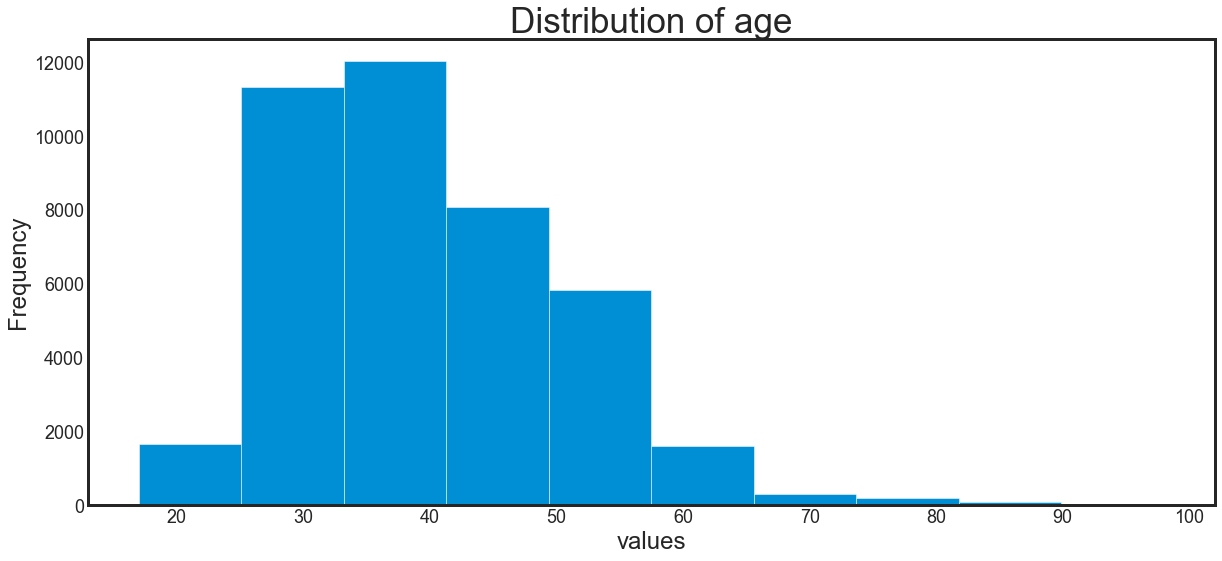

In [84]:
viz.plot_hist(df, 'age')

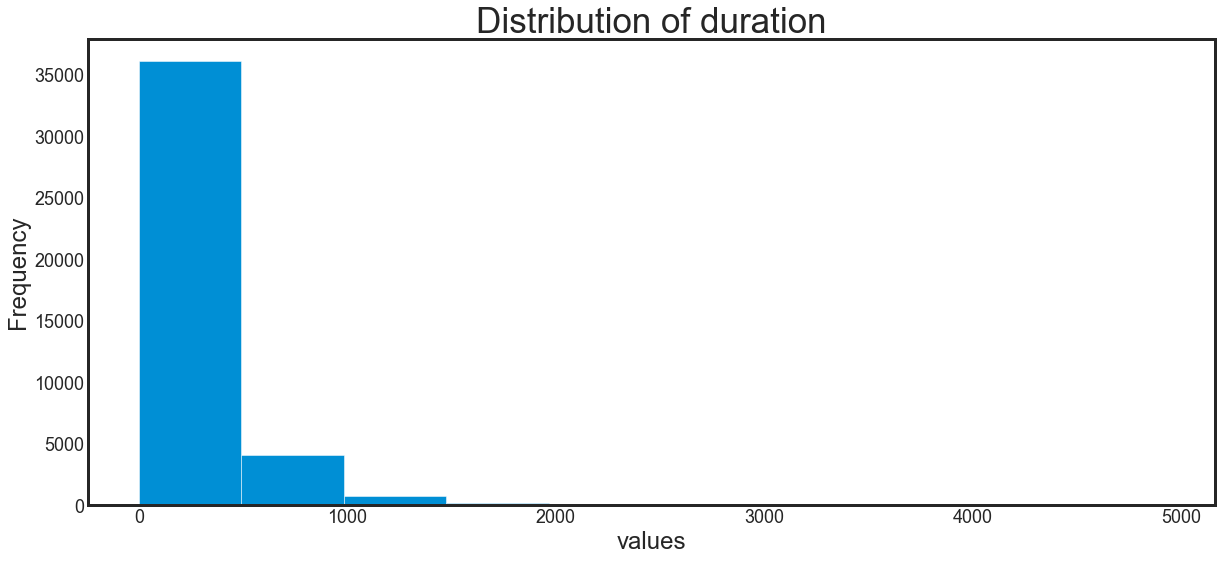

In [85]:
viz.plot_hist(df, column='duration')

The Duration is left skewed meaning that most values in the data is small and only a few is large or too big compared to the minimum. To further clear this let plot a Box Plot 

No handles with labels found to put in legend.


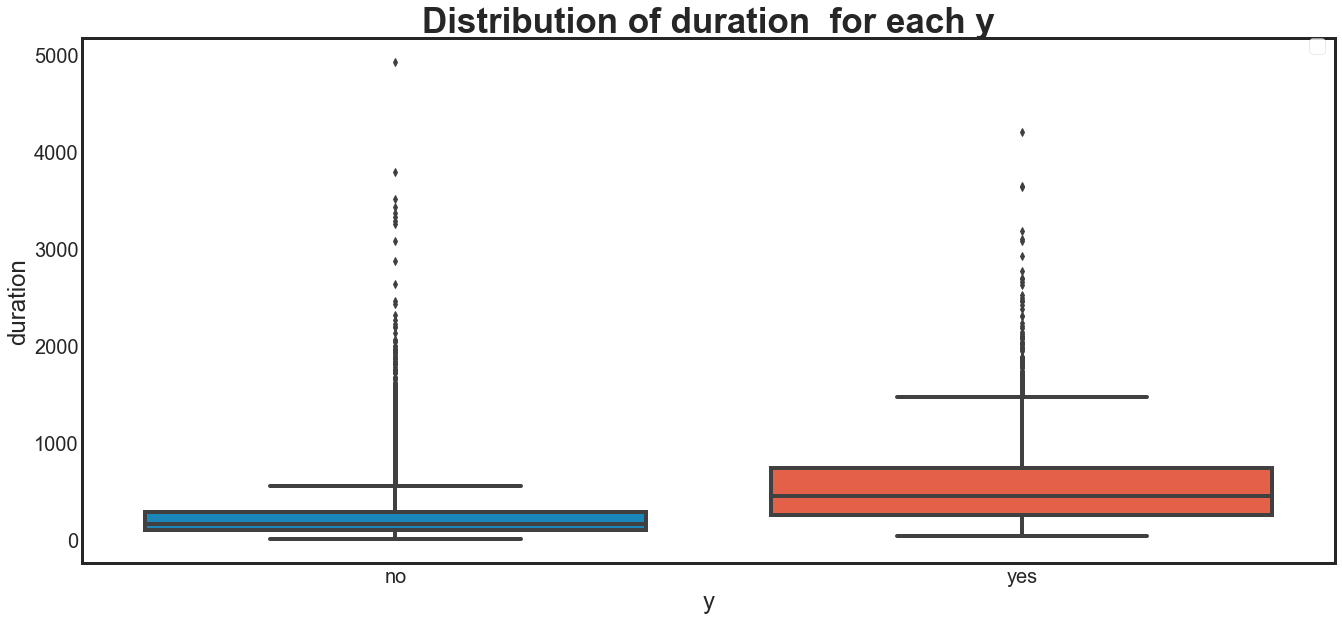

In [54]:
viz.plot_box(data=df, x='y', y='duration')

Duration seems to be a good separator feature for our target y. Average duration for a client to subscribe for a term deposit is more than the average duration of client that will not subscribed.
Out lier is present in the distribution of user that did not subscribe

No handles with labels found to put in legend.


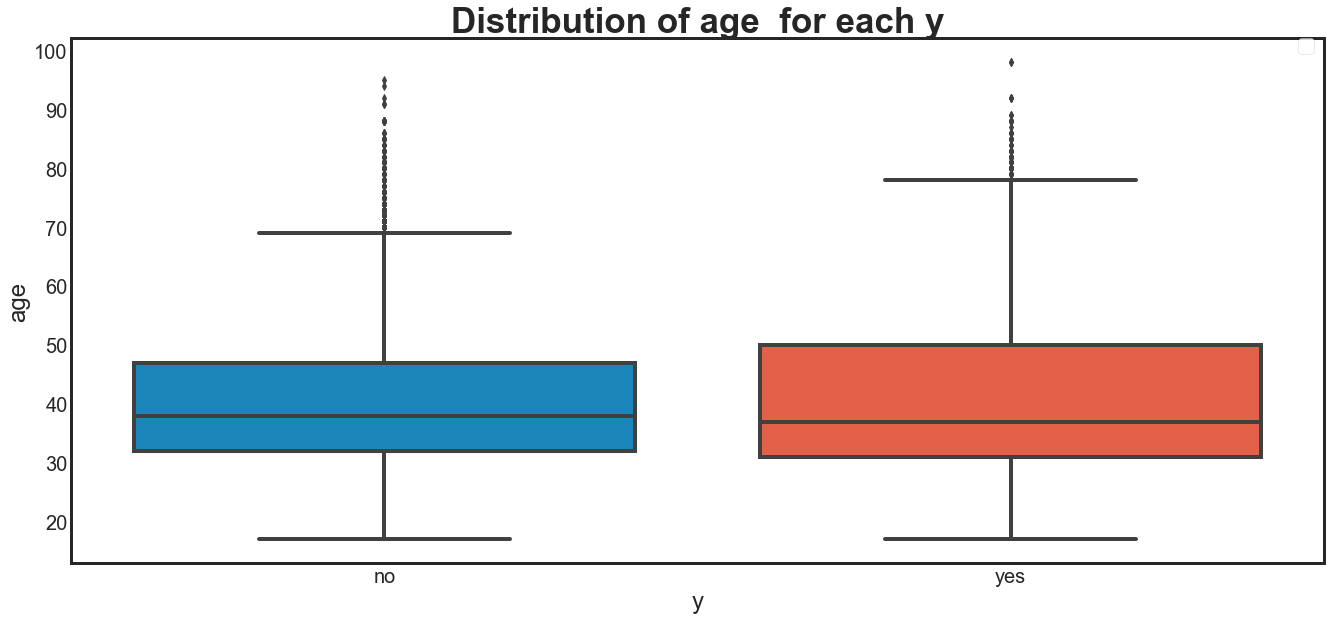

In [86]:
viz.plot_box(data=df, x='y', y='age')

Age also differs in distribution according to the target. Maximum age of client that subscribe is higher than does that did not subscribe

> **Check the correlation between some of the continuous columns.**

A scatter plot will help verify if a correlation exist between 2 features

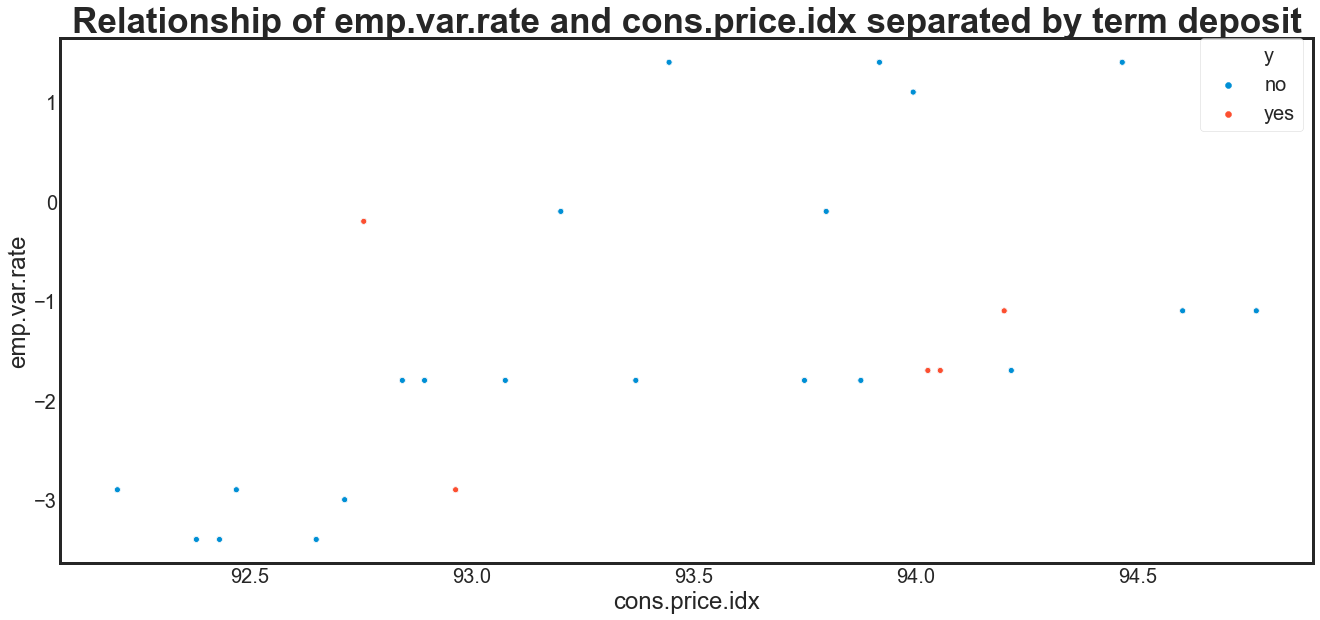

In [97]:
viz.plot_scatter(df, 'cons.price.idx', 'emp.var.rate')

No correlation

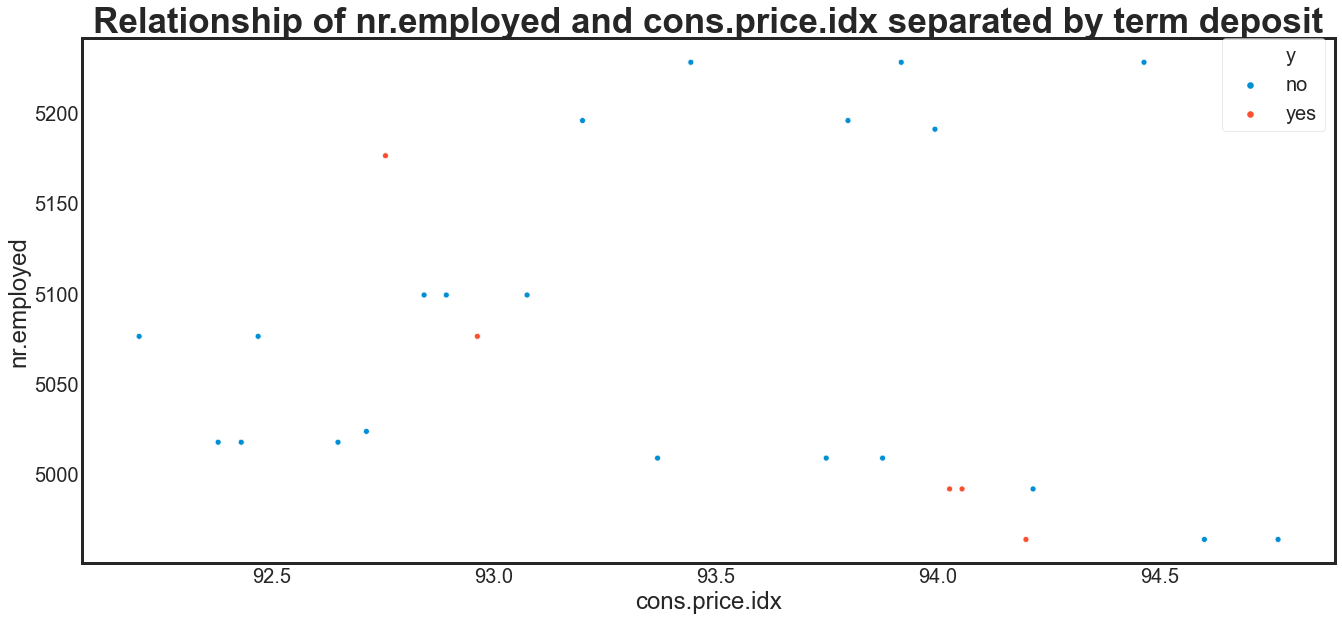

In [98]:
viz.plot_scatter(data=df, x='cons.price.idx', y='nr.employed')

No correlation

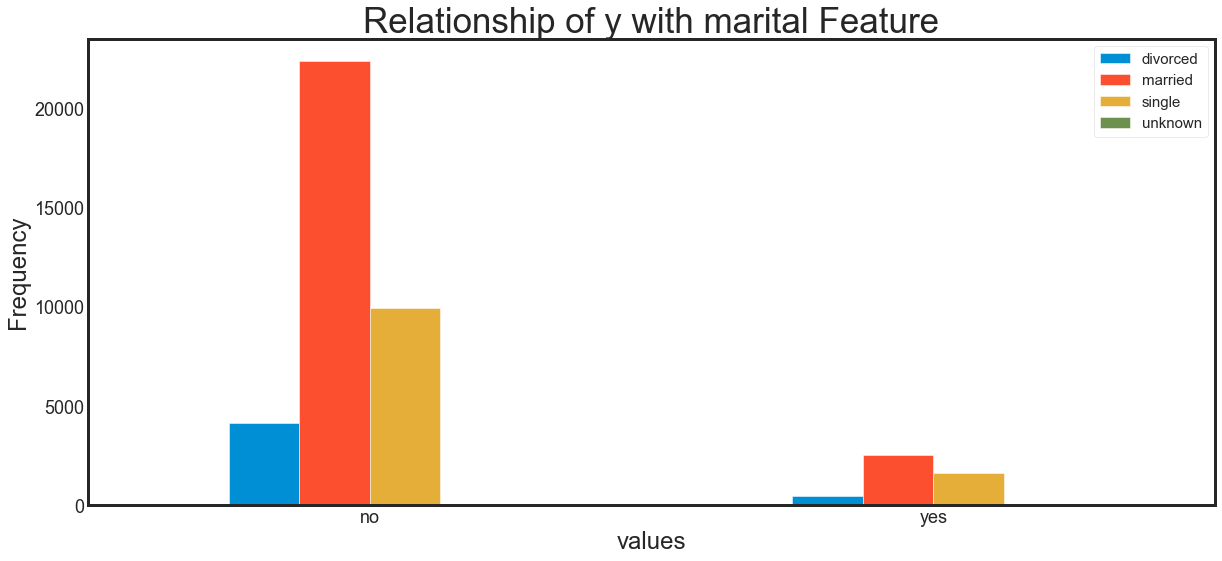

In [100]:
viz.plot_crosstab(df, 'marital', 'y')

Most of the clients are married and have not subscribed to a term deposit

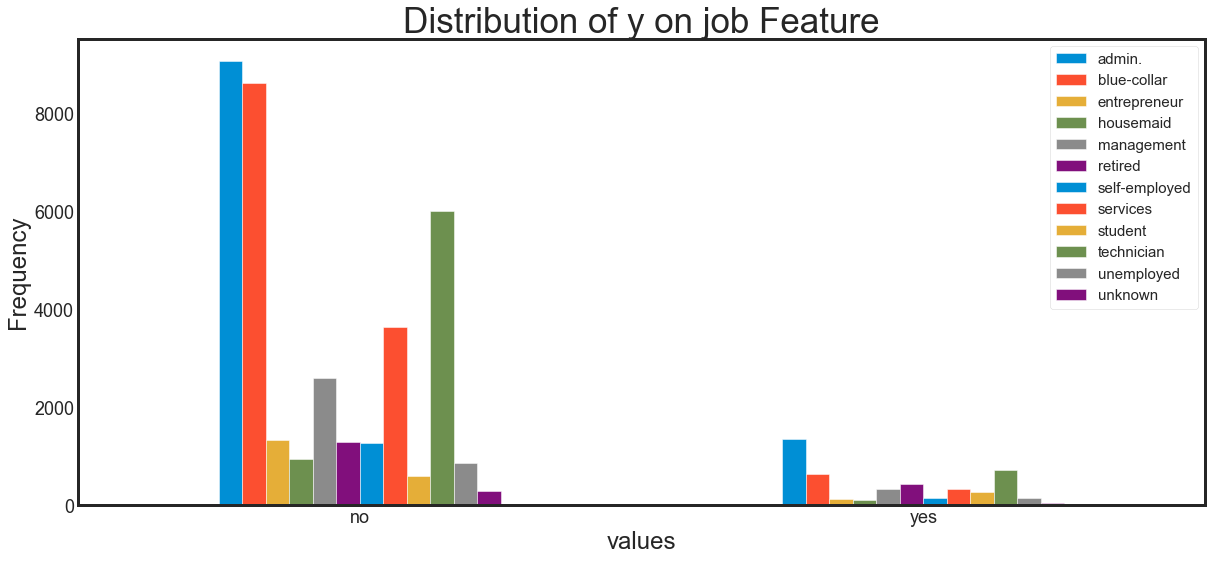

In [27]:
viz.plot_crosstab(df, column='job', target='y')

Administrative Roles and Blue-collar Job are the Most common among clients

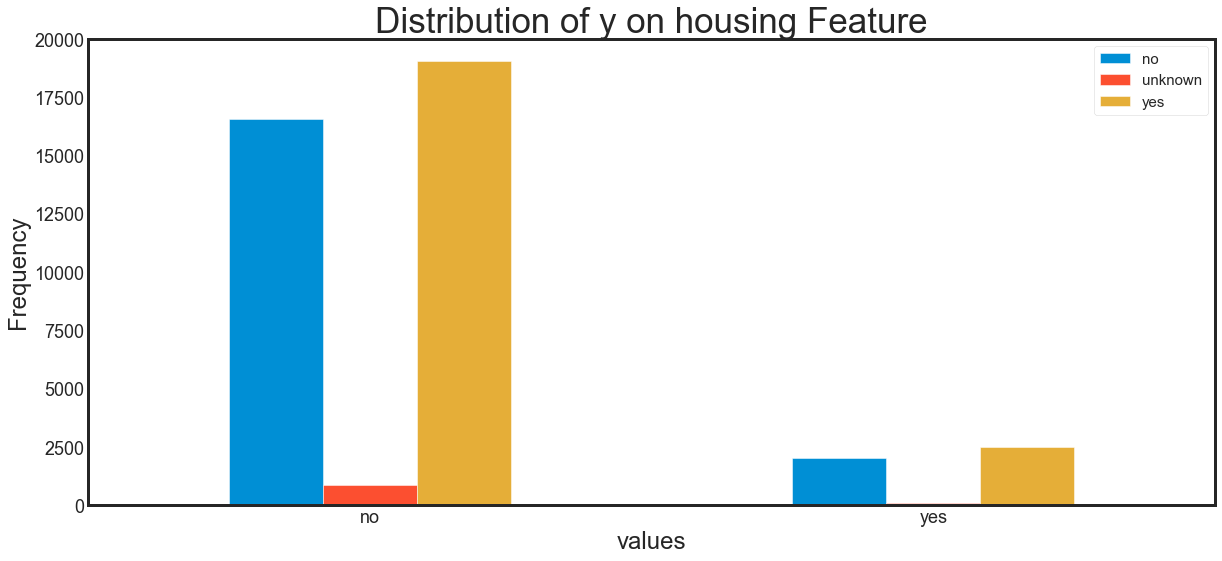

In [28]:
plot_crosstab(df, column='housing', target='y')

Based on the data distribution, clients with house has subscribed to a term deposit plan more than clients without a house.

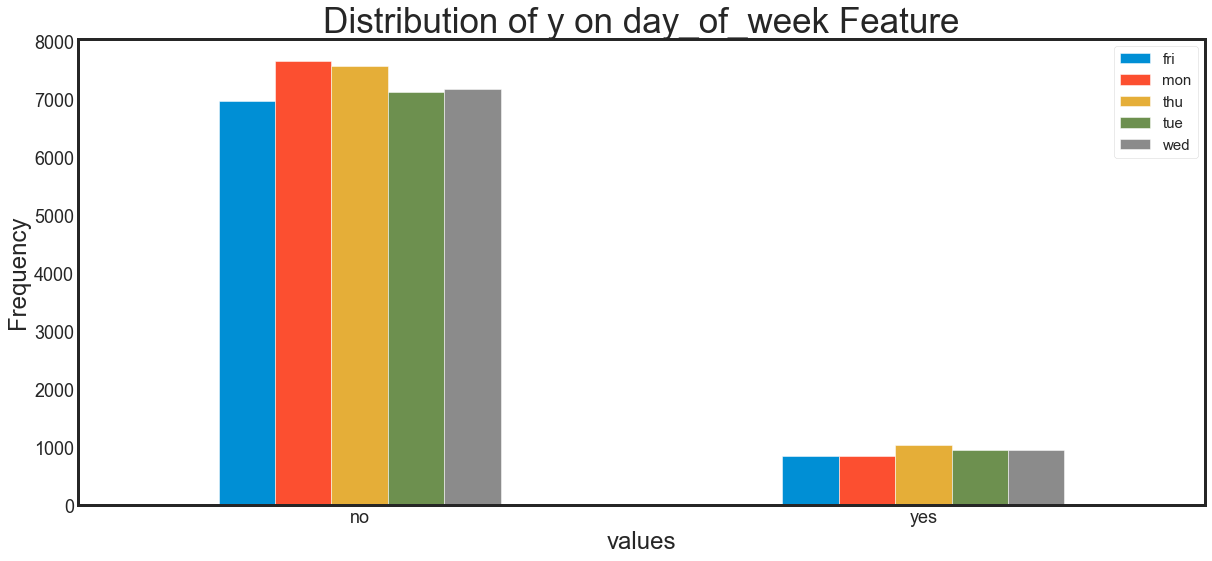

In [29]:
plot_crosstab(df, column='day_of_week', target='y')

Most Subscribed day of week is **THURSDAY**

**Identify the class Imbalance**

<AxesSubplot:>

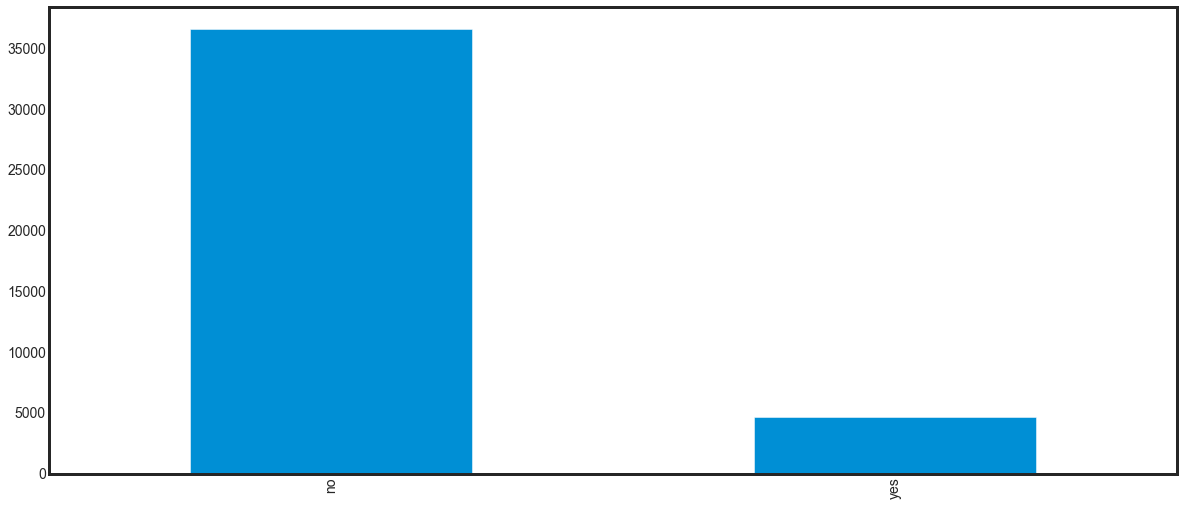

In [34]:
df['y'].value_counts().plot(kind='bar')

The data is significantly unbalanced. Most Client did not subscribe to a term Deposit

To fix this in terms of modelling i.e building a predictive model, i plan to augument the data by

1. adding more data where client subscribed to a term deposit
2. or augument by removing some observations where client has not subscribed to a term deposit

This will be done either maually or using a smote or imblearn library

### ${\textbf{Additional Bivariate Analysis}}$

This is done to identify and prove that some columns can be used to separate the target (y -- term deposit)

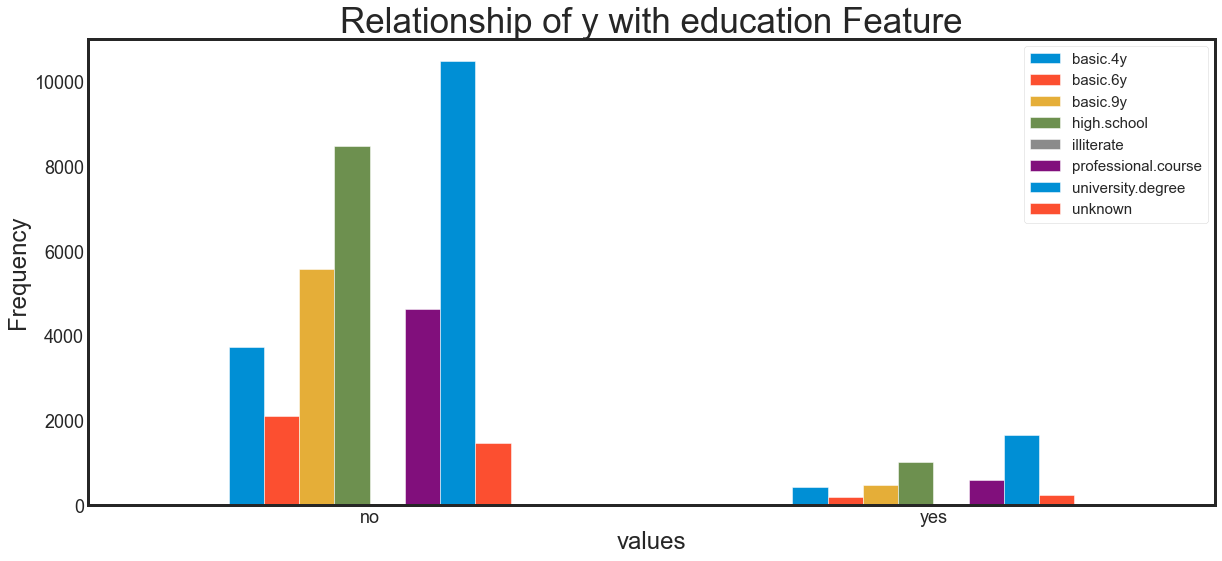

In [36]:
plot_crosstab(df, column='education', target='y')

Most clients are degree holders and did not subscribe for a term deposit

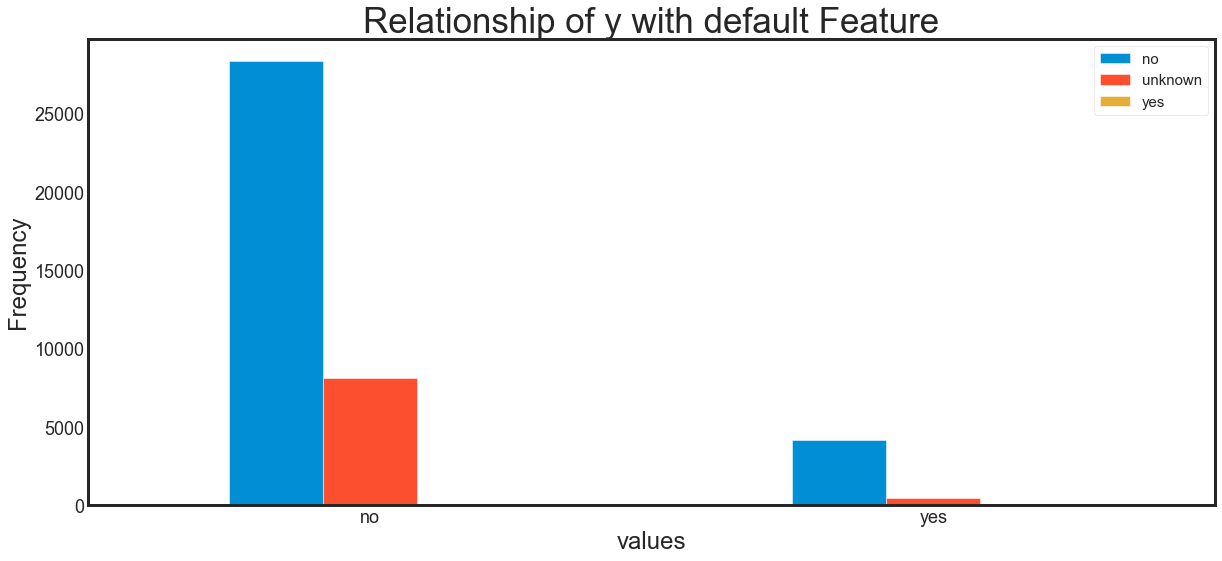

In [37]:
plot_crosstab(df, column='default', target='y')

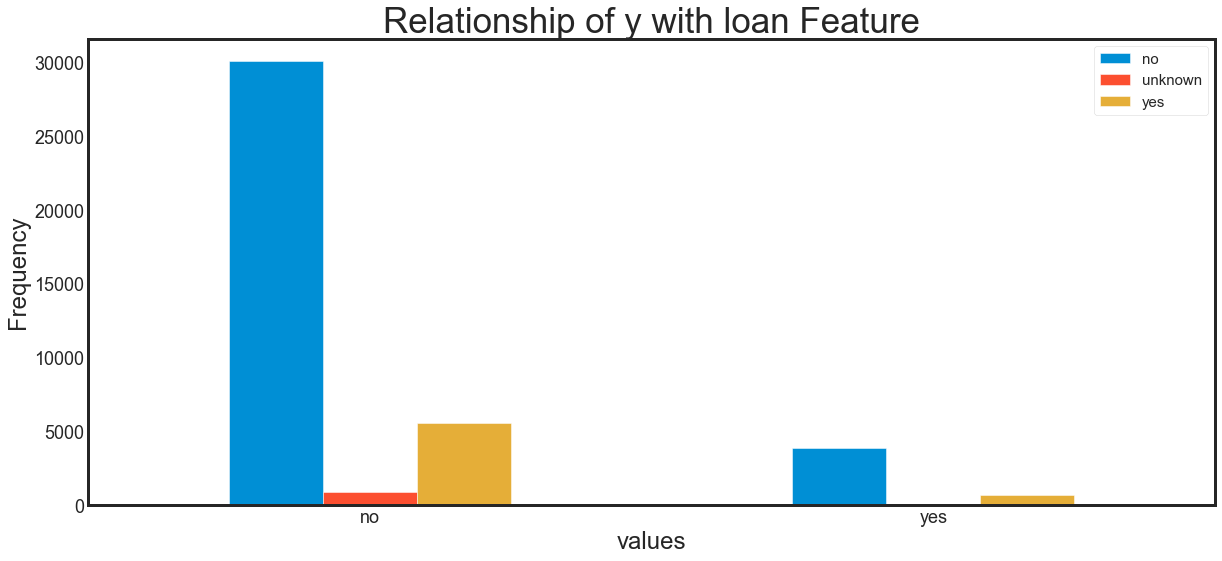

In [38]:
plot_crosstab(df, column='loan', target='y')

 > From the bivariate analysis, can you identify potential columns that could be helpful in currently separating the target column?
 
 **Columns that can be used to separate the target variable**: includes: Marital Status, education, duration, Age, loan, poutcome, day_of_week, month, contact, housing
 
 **column with outlier is** duration

##  ${\textbf{Task 1.2 - Preprocessing }}$

**Encode categorical variables - identify all categorical columns and use one-hot encoding to transform them into numerical columns**

Now for this part a careful observation is needed: Mistake here is not very crucial to model performance but this step is important

For all Nominal Features like dayofweek, month, job, education etc One Hot Encoding will be used

For all Ordinal Features like campaign Interger Encoding will be used

### ${\textbf{**Building Pipeline with OOP Approach**}}$

#### ${\textbf{Data.py File}}$ - contains all functions and class you write to do the pre-processing  

How to execute data.py <br>
| from data import myTransformer <br>
| transformer = myTransformer() <br>
| transformer.fit(data) <br>
| transformed_data = transformer.transform(data)

In [239]:
from sklearn.preprocessing import RobustScaler
class myTransformer():
    """
    A pipeline class that fit the feature transform and make them ready for training and prediction
    Fix missing values using the function fix_missing()
    Encode Categorical Datatype to an Integer
    Extract Features from Date and generate more Features
    Scale the data using RobustScaler()
    """
    def __init__(self):
        print('Initializing Binarizer......\n')
        # initialize all binarizer variables
        print('Binarizer Ready for Use!!!!!\n')
        
        # initialize the data scaler
        self.dataScaler=RobustScaler()
        print('Scaler is Ready!!')
        
     # the data will need alot of cleaning maybe not so much 
# let get started

# Function to calculate missing values by column
    def missing_values_table(df):
        """
        calculate missing values in a dataframe df
        returns: missing values table that comprise of count % of missing and their datatype
        """
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Datatypes of missing values
        mis_val_dtypes = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtypes], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2 : 'Data Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns, mis_val_table_ren_columns.index

    # fix outlier
    def fix_outlier(self, df, column):
        """
        Fix Outlier will take 2 argument
        df = dataframe
        column = column that has an outlier value(s)
        outlier will be replaced by median value of any column 
        return a series of fixed outier
        """
        df[column] = np.where(df[column] > df[column].quantile(0.95),
                                            df[column].median(),
                                            df[column])
        return df[column]
      
        
    def encode_categorical_to_integer(self, data):
        """
        convert or change object datatype into integers
        for modelling
        Function takes 1 arguments 
        data : dataframe that contains column(s) of type object
        columns: a list of columns that are of type object
        the funtion does not return object, it does it computation implicitly
        """
        # get the list of columns that are object data types
        categorical_columns = data.columns[data.dtypes == 'object'].tolist()
        # if a categorical descriptive feature has only 2 levels,
        # define only one binary variable
        for col in categorical_columns:
            n = len(data[col].unique())
            if n == 2:
                data[col] = pd.get_dummies(data[col], drop_first=True)

        # for other categorical features (with n > 2 unique values), use regular 
        # one-hot-encoding
        # if a feature is numeric, it will be untouched
        data = pd.get_dummies(data)
        return data

    
    
    # Fit all the binarisers on the training data
    def fit(self,input_data):
        """ CHeck For Missing Values"""
         # Check Missing
        print('Fixing Missing Values if any\n for int/float column fill with median otherwise No Data')
        table, missing_column = missing_values_table(input_data)
        input_data = fix_missing(df=input_data, column=missing_column)

#         print('Features Encoded to Interger \n\nReady for Modelling\n')

    # Transform the input data using the fitted binarisers
    def transform(self, full_dataset, target, train=False):
        """
        Transformation on data is carried out when this function is called
        Arguments -- \
        full_dataset: data to be transformed
        target: dependent variable/feature or target variable
        steps involve for transformation include
        1. Copy the original data so all transformation is done on a duplicate data
        2. specify target column and drop from the data
        3. Add some features this part is the feature engineering part can be improved NB only 2 
            features will be added
        4. Map some similar features into one for proper encoding more on this later 
        5. convert object data types column to interger using the One Hot Encoding Techniques
        6. Scale the Data using the robust scaler algorithm: this was choosing because it is less 
            susceptible to outlier even though outlier from the exploratory analysis is not present
            in this data.
        7. Apply Dimensionality Reduction using
        7. Add the target column back to the data
        8. Return the transformed dataframe
        """
        
        # making a copy of the input because we dont want to change the input in the main function
        input_data=full_dataset.copy()
        
        # encode target 
        input_data[target] = input_data[target].replace({'no':0, 'yes':1})
        tar = input_data[target]
        input_data = input_data.drop(target, axis=1)
        
            
        ############################ New Features #################################
        print('Generating Features..\n')
        # bin or split numeric feature age into 3 groups of young middle-aged and old 
        input_data['age_bin'] = pd.qcut(input_data['age'], q=3,
                                        labels=['young', 'middle-aged', 'old'])
        input_data['age_per_edu'] = input_data.groupby('education')['age'].transform('mean')
        input_data['age_per_marital'] = input_data.groupby('marital')['age'].transform('mean')
        
        education_mapping = {'basic.4y': 'basic',"basic.6y": "basic","basic.9y": "basic"}
        input_data["education"] = input_data["education"].replace(education_mapping)
        
        # ​pdays:​ number of days that passed by after the client was last contacted from 
        # a previous campaign (numeric; 999 means client was not previously contacted) 
        # Instead of 999 which will affect the model, i decide to change/replace it with 0
        input_data['pdays'] = input_data['pdays'].replace({999: 0})

        # encode categorical object
        input_data = encode_categorical_to_integer(input_data) 
        
        print('Drop the Duration column')
        input_data = input_data.drop('duration', axis=1)
    
        # scale dataframe
        print('Scaling Data using Robust Scaler Method\n')
        input_data = pd.DataFrame(self.dataScaler.fit_transform(input_data),
                                  columns=input_data.columns)
        
        
        # this concatenates all the data
        input_data[target] = tar
        print(f'Shape of data is {input_data.shape}')
        print('Done!!!! Pipeline process completed')
        return input_data
    
    def fix_imbalance_data(self, data, target):
        """
        This object is an implementation of SMOTE - Synthetic Minority
        Over-sampling Technique as presented in.
        SMOTE technique is selected to fix the imbalance data because it incoporate some algorithms
        that has proven to be a good fit for this type of problem like SVC - Support Vector Classifier
        & KNearestNeighbour to generate additional data in other to balance the data.
        
        Imbalance data occur in a classification problem: When one class is significantly more than
        or greater than the other class like ratio 80 to 20 or 90 to 10.
        NB: Specifying
        return splitted data feature_train, feature_test, target_train, target_test
        """
        from imblearn.over_sampling import SMOTE
        from sklearn.model_selection import train_test_split
        print('Fixing Imbalnced Data..')
        # separate input features and target
        X = data.drop(target, axis=1)
        y = data[target]

        # Split data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020, 
                                                            test_size=.1, stratify = y)
        
        # instantiate the SMOTE model
        sm = SMOTE(random_state=21, ratio=1.0)
        
        # apply the smote model
        X_train, y_train = sm.fit_sample(X_train, y_train)
        
        # convert data into a dataframe
#         X_train = pd.DataFrame(X_train, columns=X.columns)
#         X_test = pd.DataFrame(X_test, columns=X.columns)
#         y_train = pd.DataFrame(y_train)
#         y_test = pd.DataFrame(y_test)

        # output shape of train and test data
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        return X, y, X_train, X_test, y_train, y_test
    
    # apply PCA
    def apply_pca(self, X_train, X_test):
        # import pca
        from sklearn.decomposition import PCA
        # make an instance of pca
        pca = PCA(n_components=13)
        # Fit PCA with our standardized data.
        pca.fit(X_train)
        # The attribute shows how much variance is explained by each of the seven individual components.
        print('Explained Variance by Our PCA ::', pca.explained_variance_ratio_)
        # apply the pca to both the train and test set
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)
        return X_train, X_test

A Crude Way to determine the number of components to use in my PCA from the chart n_components = 13

Explained Variance by Our PCA :: [2.67279808e-01 2.63070424e-01 7.29794167e-02 5.10923808e-02
 4.95065187e-02 3.57944420e-02 2.20751131e-02 1.97975706e-02
 1.86231241e-02 1.60580067e-02 1.36557361e-02 1.32762444e-02
 1.20336599e-02 1.08800039e-02 1.05643866e-02 9.99066914e-03
 9.28500566e-03 9.13400146e-03 8.72026355e-03 8.52572829e-03
 8.19999813e-03 7.34246163e-03 6.79628031e-03 6.08838201e-03
 5.16643632e-03 4.00138230e-03 3.71730332e-03 3.55594420e-03
 3.28538577e-03 3.20994597e-03 2.90472261e-03 2.64952776e-03
 2.49683349e-03 2.25791881e-03 1.92716070e-03 1.89105419e-03
 1.55851148e-03 1.52517319e-03 1.41374523e-03 1.30938636e-03
 1.26285198e-03 1.11022426e-03 1.09294794e-03 1.00931644e-03
 8.61876907e-04 4.41676676e-04 3.28041521e-04 1.12272494e-04
 7.04486155e-05 4.12010388e-05 2.57999297e-05 3.28459931e-06
 9.70457757e-31 5.27116479e-32 1.00721844e-32 8.18822683e-33
 6.67110005e-33 3.63412430e-33 3.56340503e-33 3.00266997e-33
 2.76930899e-33 1.95421286e-33 1.49739199e-33 4.0076

Text(0, 0.5, 'Cumulative Explained Variance')

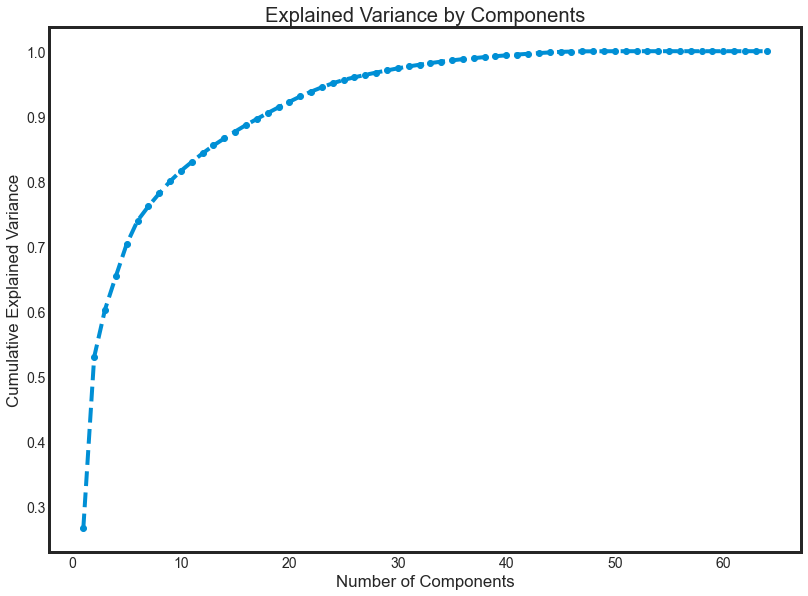

In [208]:
 # import pca
from sklearn.decomposition import PCA
# make an instance of pca
pca = PCA()
# Fit PCA with our standardized data.
pca.fit(fe_tr)
# The attribute shows how much variance is explained by each of the seven individual components.
print('Explained Variance by Our PCA ::', pca.explained_variance_ratio_)
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,65), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [240]:
df1 = df.copy()
pipe = myTransformer()
pipe.fit(df1)
data1 = pipe.transform(df1, target='y')
X, y, fe_tr, fe_te, t_tr, t_te = pipe.fix_imbalance_data(data1, target='y')

feature_train, feature_test = pipe.apply_pca(fe_tr, fe_te)
feature_train.shape, feature_test.shape

Initializing Binarizer......

Binarizer Ready for Use!!!!!

Scaler is Ready!!
Fixing Missing Values if any
 for int/float column fill with median otherwise No Data
Your selected dataframe has 21 columns.
There are 0 columns that have missing values.
Generating Features..

Drop the Duration column
Scaling Data using Robust Scaler Method

Shape of data is (41188, 65)
Done!!!! Pipeline process completed
Fixing Imbalnced Data..
(65786, 64) (4119, 64) (65786,) (4119,)
Explained Variance by Our PCA :: [0.27144945 0.25999349 0.07264633 0.05097348 0.04965822 0.03519348
 0.02219839 0.01969745 0.0182454  0.01617166 0.01365543 0.01312031
 0.01195231]


((65786, 13), (4119, 13))

### ${\textbf{**Building Machine Learning Models**}}$

#### ${\textbf{Model.py}}$ - contains all functions and classes you write to generate your three models

In [304]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pickle
        
class Model:
    """
    A class for Algorithms implementations and model building
    """
    
    def __init__(self):
        print('Model Class Ready')
        
            ######################## LOGISTIC REGRSSION #######################################
    def run_logistic_regression(self, X_train, X_val, Y_train, Y_val):
        
        model_name = '26-08-2020-20-32-31-00-log-reg.pkl'
        # initialze the kfold
        kfold, scores = KFold(n_splits=5, shuffle=True, random_state=221), list()
        # split data index to train and test
        for train, test in kfold.split(X_train):
            # specify train and test sets
            x_train, x_test = X_train[train], X_train[test]
            y_train, y_test = Y_train[train], Y_train[test]
            
            # initialize the model
            model = LogisticRegression(random_state=27,  solver='lbfgs')
            # train
            model.fit(x_train, y_train)
            # predict for evaluation
            preds = model.predict(x_test)
            # compute f1-score
            score = f1_score(y_test, preds)
            scores.append(score)
            test_pred = model.predict(X_val)
            print('f1-score: ',score)
        print("Average: ", sum(scores)/len(scores))

        # save model
        pickle.dump(model, open(model_name, 'wb'))
        print(f'Model Saved {model_name}')
        return model, scores, test_pred
    
        ######################## XGBOOST #######################################
    def run_xgboost(self, X_train, X_val, Y_train, Y_val):
        model_name = '26-08-2020-20-32-31-00-xgboost.pkl'
        kfold, scores = KFold(n_splits=5, shuffle=True, random_state=221), list()
        pred_tot_cb = []
        for train, test in kfold.split(X_train):     
            x_train, x_test = X_train[train], X_train[test]
            y_train, y_test = Y_train[train], Y_train[test]

            model = XGBClassifier(random_state=27,  n_estimators=800, verbose=500,  learning_rate=0.1,
                             early_stopping_rounds=100, objective='binary:logistic')
            eval_set  = [(x_train,y_train), (x_test,y_test)]
            model.fit(x_train, y_train, eval_set=eval_set, eval_metric="auc", verbose=400)
            preds = model.predict(x_test)
            score = f1_score(y_test, preds)
            scores.append(score)
            test_pred = model.predict(X_val)
            pred_tot_cb.append(test_pred)
            print('f1-score: ',score)
        print("Average: ", sum(scores)/len(scores))

        # save model
        pickle.dump(model, open(model_name, 'wb'))
        print(f'Model Saved {model_name}')
        return model, scores, test_pred
        
        ######################## MULTILAYER PERCEPTRON #######################################
    def run_mlp(self, X_train, X_val, Y_train, Y_val):
        model_name = '26-08-2020-20-32-31-00-mlp.pkl'
        kfold, scores = KFold(n_splits=5, shuffle=True, random_state=221), list()
        pred_tot_cb = []
        for train, test in kfold.split(X_train): 
            x_train, x_test = X_train[train], X_train[test]
            y_train, y_test = Y_train[train], Y_train[test]

            model = MLPClassifier(hidden_layer_sizes=(200,))
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            score = f1_score(y_test, preds)
            scores.append(score)
            test_pred = model.predict(X_val)
            pred_tot_cb.append(test_pred)
            print('f1-score: ',score)
        print("Average: ", sum(scores)/len(scores))

        # save model
        pickle.dump(model, open(model_name, 'wb'))
        print(f'Model Saved {model_name}')
        return model, scores, test_pred
    
        ######################## SUPPORT VECTOR MACHINE #######################################
    def run_svc(self, X_train, X_val, Y_train, Y_val, kernal='poly'):
        from sklearn.svm import SVC
        model_name = '26-08-2020-20-32-31-00-svc.pkl'
        kfold, scores = KFold(n_splits=5, shuffle=True, random_state=221), list()
        pred_tot_cb = []
        for train, test in kfold.split(X_train): 
            x_train, x_test = X_train[train], X_train[test]
            y_train, y_test = Y_train[train], Y_train[test]

            model = SVC(kernel=kernal)
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            score = f1_score(y_test, preds)
            scores.append(score)
            test_pred = model.predict(X_val)
            pred_tot_cb.append(test_pred)
            print('f1-score: ',score)
        print("Average: ", sum(scores)/len(scores))

        # save model
        pickle.dump(model, open(model_name, 'wb'))
        print(f'Model Saved {model_name}')
        return model, scores, test_pred
    
    ######################## DECISION TREE #######################################
    def run_decision_tree(self, X_train, X_val, Y_train, Y_val):
        from sklearn.tree import DecisionTreeClassifier
        model_name = '26-08-2020-20-32-31-00-tree.pkl'
        kfold, scores = KFold(n_splits=5, shuffle=True, random_state=221), list()
        pred_tot_cb = []
        for train, test in kfold.split(X_train): 
            x_train, x_test = X_train[train], X_train[test]
            y_train, y_test = Y_train[train], Y_train[test]

            model = DecisionTreeClassifier(max_depth=7)
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            score = f1_score(y_test, preds)
            scores.append(score)
            test_pred = model.predict(X_val)
            pred_tot_cb.append(test_pred)
            print('f1-score: ',score)
        print("Average: ", sum(scores)/len(scores))

        # save model
        pickle.dump(model, open(model_name, 'wb'))
        print(f'Model Saved {model_name}')
        return model, scores, test_pred
    
    ##################### RANDOM FOREST CLASSIFIER ##############################
    def run_random_forest(self, X_train, X_val, Y_train, Y_val):
        from sklearn.ensemble import RandomForestClassifier
        model_name = '26-08-2020-20-32-31-00-ran-reg.pkl'
        kfold, scores = KFold(n_splits=5, shuffle=True, random_state=221), list()
        pred_tot_cb = []
        for train, test in kfold.split(X_train): 
            x_train, x_test = X_train[train], X_train[test]
            y_train, y_test = Y_train[train], Y_train[test]

            model = RandomForestClassifier(n_estimators=300)
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            score = f1_score(y_test, preds)
            scores.append(score)
            test_pred = model.predict(X_val)
            pred_tot_cb.append(test_pred)
            print('f1-score: ',score)
        print("Average: ", sum(scores)/len(scores))

        # save model
        pickle.dump(model, open(model_name, 'wb'))
        print(f'Model Saved {model_name}')
        return model, scores, test_pred
    
    ##################### GRADIENT BOOSTING CLASSIFIER ##############################
    def run_gradient_boost(self, X_train, X_val, Y_train, Y_val):
        from sklearn.ensemble import GradientBoostingClassifier
        model_name = '26-08-2020-20-32-31-00-grb.pkl'
        kfold, scores = KFold(n_splits=5, shuffle=True, random_state=221), list()
        pred_tot_cb = []
        for train, test in kfold.split(X_train): 
            x_train, x_test = X_train[train], X_train[test]
            y_train, y_test = Y_train[train], Y_train[test]

            model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5)
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            score = f1_score(y_test, preds)
            scores.append(score)
            test_prediction = model.predict(X_val)
            pred_tot_cb.append(test_prediction)
            print('f1-score: ',score)
        print("Average: ", sum(scores)/len(scores))

        # save model
        pickle.dump(model, open(model_name, 'wb'))
        print(f'Model Saved {model_name}')
        return model, scores, test_prediction

In [305]:
algo = Model()

Model Class Ready


In [282]:
log_model, scores, prediciton = algo.run_logistic_regression(feature_train, feature_test, t_tr, t_te)

f1-score:  0.7185628742514971
f1-score:  0.7272871790795644
f1-score:  0.7243023528492143
f1-score:  0.71726875744343
f1-score:  0.7172799999999999
Average:  0.7209402327247412
Model Saved 26-08-2020-20-32-31-00-log-reg.pkl


In [306]:
xgb_model, scores, prediciton = algo.run_xgboost(feature_train, feature_test, t_tr, t_te)

[0]	validation_0-auc:0.771772	validation_1-auc:0.768306
[400]	validation_0-auc:0.870336	validation_1-auc:0.850338
[799]	validation_0-auc:0.897578	validation_1-auc:0.869416
f1-score:  0.7685702713649251
[0]	validation_0-auc:0.765941	validation_1-auc:0.774912
[400]	validation_0-auc:0.869612	validation_1-auc:0.857092
[799]	validation_0-auc:0.89702	validation_1-auc:0.873649
f1-score:  0.7746262626262627
[0]	validation_0-auc:0.771938	validation_1-auc:0.767849
[400]	validation_0-auc:0.870322	validation_1-auc:0.85168
[799]	validation_0-auc:0.89842	validation_1-auc:0.86881
f1-score:  0.7739047009913654
[0]	validation_0-auc:0.77155	validation_1-auc:0.765926
[400]	validation_0-auc:0.870968	validation_1-auc:0.849242
[799]	validation_0-auc:0.899471	validation_1-auc:0.867729
f1-score:  0.76795757673148
[0]	validation_0-auc:0.77125	validation_1-auc:0.768377
[400]	validation_0-auc:0.872169	validation_1-auc:0.850203
[799]	validation_0-auc:0.899512	validation_1-auc:0.867848
f1-score:  0.770145848610771

In [283]:
random_model, random_scores, random_prediction = algo.run_random_forest(feature_train, feature_test, t_tr, t_te)

f1-score:  0.8972923914687642
f1-score:  0.8993055555555556
f1-score:  0.8989050547472627
f1-score:  0.8938253012048193
f1-score:  0.8921882137962539
Average:  0.8963033033545311
Model Saved 26-08-2020-20-32-31-00-ran-reg.pkl


In [199]:
Without PCA

[0]	validation_0-auc:0.789041	validation_1-auc:0.792913
[400]	validation_0-auc:0.977214	validation_1-auc:0.975454
[799]	validation_0-auc:0.979728	validation_1-auc:0.975599
[0]	validation_0-auc:0.792467	validation_1-auc:0.789087
[400]	validation_0-auc:0.977602	validation_1-auc:0.972584
[799]	validation_0-auc:0.980259	validation_1-auc:0.97276
[0]	validation_0-auc:0.790334	validation_1-auc:0.787692
[400]	validation_0-auc:0.977223	validation_1-auc:0.974649
[799]	validation_0-auc:0.979863	validation_1-auc:0.974988
[0]	validation_0-auc:0.78943	validation_1-auc:0.791552
[400]	validation_0-auc:0.977314	validation_1-auc:0.973767
[799]	validation_0-auc:0.980024	validation_1-auc:0.97434
[0]	validation_0-auc:0.789831	validation_1-auc:0.789486
[400]	validation_0-auc:0.977084	validation_1-auc:0.975113
[799]	validation_0-auc:0.979492	validation_1-auc:0.975512
Average:  0.9393642255564714
Model Saved 26-08-2020-20-32-31-00-xgboost.pkl


In [285]:
svm_model, svm_scores, svm_prediction = algo.run_svc(feature_train, feature_test, t_tr, t_te)

f1-score:  0.7230062630480167
f1-score:  0.7299099699899967
f1-score:  0.7250432063204674
f1-score:  0.7193920160347418
f1-score:  0.7161159811193527
Average:  0.722693487302515
Model Saved 26-08-2020-20-32-31-00-svc.pkl


In [289]:
mlp_model, mlp_scores, mlp_prediction = algo.run_mlp(feature_train, feature_test, t_tr, t_te)

f1-score:  0.8036757261895492
f1-score:  0.81525282389508
f1-score:  0.8216068996822514
f1-score:  0.7977634273113876
f1-score:  0.7981915971626784
Average:  0.8072980948481894
Model Saved 26-08-2020-20-32-31-00-mlp.pkl


In [290]:
tree_model, tree_scores, tree_prediction = algo.run_decision_tree(feature_train, feature_test, t_tr, t_te)

f1-score:  0.7335504885993485
f1-score:  0.7374756018217306
f1-score:  0.7293555299159388
f1-score:  0.7269448315435691
f1-score:  0.7253293562018395
Average:  0.7305311616164853
Model Saved 26-08-2020-20-32-31-00-tree.pkl


In [297]:
grb_model, grb_scores, grb_prediction = algo.run_gradient_boost(feature_train, feature_test, t_tr, t_te)

f1-score:  0.7901868034955504
f1-score:  0.7924346850456804
f1-score:  0.7942780368292105
f1-score:  0.787279827847294
f1-score:  0.7908922680827098
Average:  0.791014324260089
Model Saved 26-08-2020-20-32-31-00-grb.pkl


In [301]:
class evaluate:
    def __init__(self):
        print('Model Class for Evaluation')
        
    def eval_model(self, target_test_data, prediction):
        from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score, precision_score
        from sklearn.metrics import classification_report
        confusion_matrix = confusion_matrix(target_test_data, prediction)
        print('Accuracy Score: ', accuracy_score(target_test_data, prediction))
        print('F1-Score: ', f1_score(target_test_data, prediction))
        print('Recall: ', recall_score(target_test_data, prediction))
        print('Precision: ', precision_score(target_test_data, prediction))
        print(confusion_matrix)
        print(classification_report(target_test_data, prediction))

    def plot_auc_curve(self, model, model_name, test_data, target_test_data):
        from sklearn.metrics import roc_auc_score
        from sklearn.metrics import roc_curve
        logit_roc_auc = roc_auc_score(target_test_data, model.predict(test_data))

        fpr, tpr, thresholds = roc_curve(target_test_data, model.predict_proba(test_data)[:,1])
        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (area under curve = %0.2f)' % logit_roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver operating characteristic ({model_name})')
        plt.legend(loc="lower right")
        plt.savefig(f'{model_name}_ROC')
        plt.show()

### ${\textbf{Random Forest}}$

Model Class for Evaluation


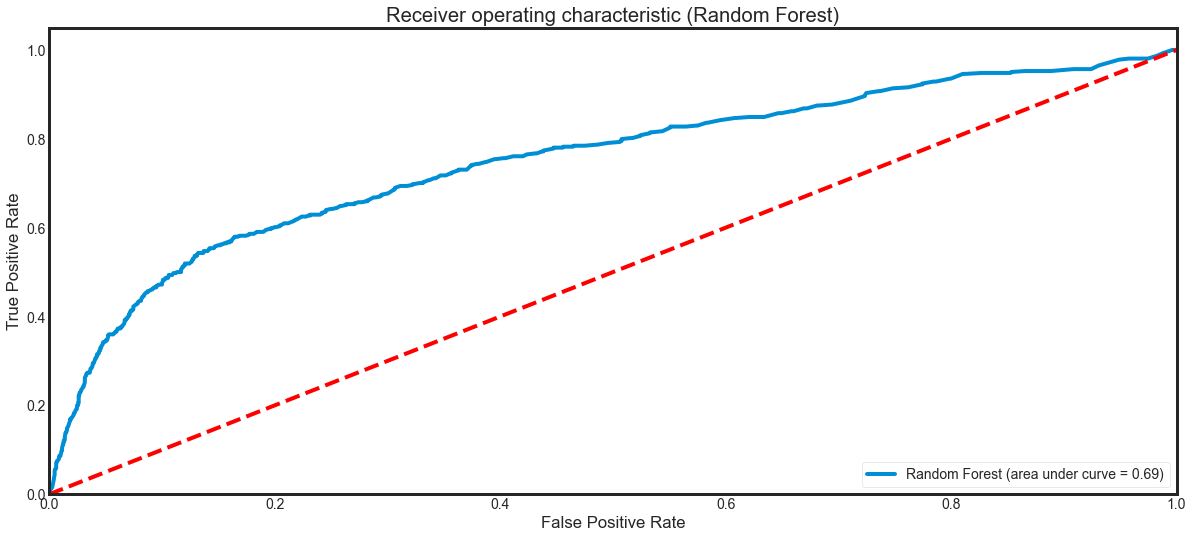

In [302]:
evaluate_model = evaluate()
evaluate_model.plot_auc_curve(random_model, 'Random Forest', feature_test, t_te)

In [303]:
evaluate_model.eval_model(t_te, random_prediction)

Accuracy Score:  0.8460791454236465
F1-Score:  0.41941391941391937
Recall:  0.49353448275862066
Precision:  0.3646496815286624
[[3256  399]
 [ 235  229]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3655
           1       0.36      0.49      0.42       464

    accuracy                           0.85      4119
   macro avg       0.65      0.69      0.67      4119
weighted avg       0.87      0.85      0.86      4119



### ${\textbf{XGBoost}}$

Model Class for Evaluation


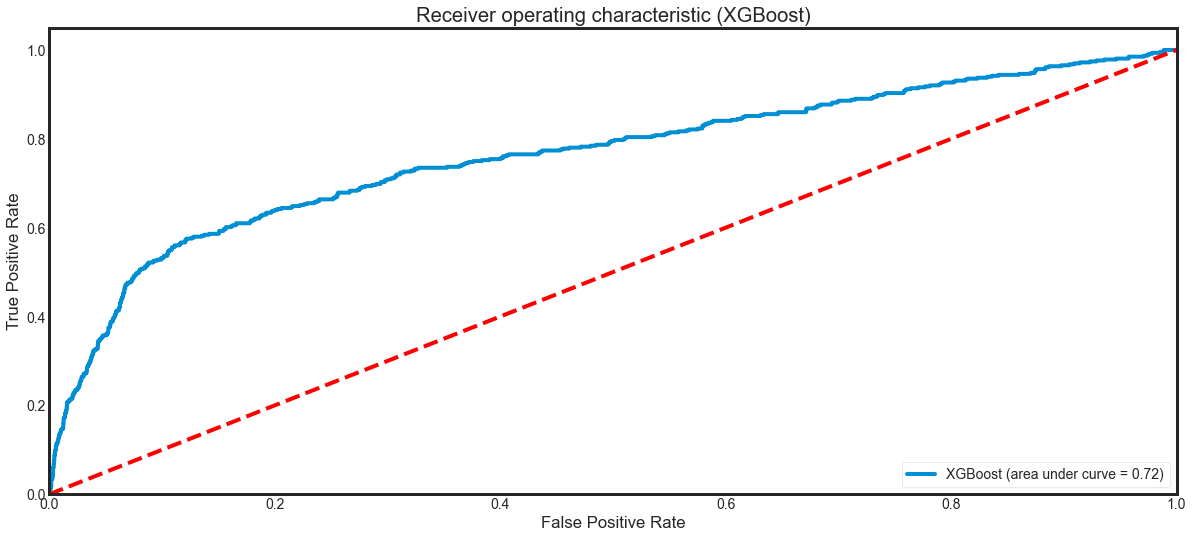

In [307]:
evaluate_model.plot_auc_curve(xgb_model, 'XGBoost', feature_test, t_te)

In [308]:
evaluate_model.eval_model(t_te, prediction)

Accuracy Score:  0.7710609371206604
F1-Score:  0.3927881519639408
Recall:  0.6573275862068966
Precision:  0.2800734618916437
[[2871  784]
 [ 159  305]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3655
           1       0.28      0.66      0.39       464

    accuracy                           0.77      4119
   macro avg       0.61      0.72      0.63      4119
weighted avg       0.87      0.77      0.81      4119



### ${\textbf{Multilayer Perceptron}}$

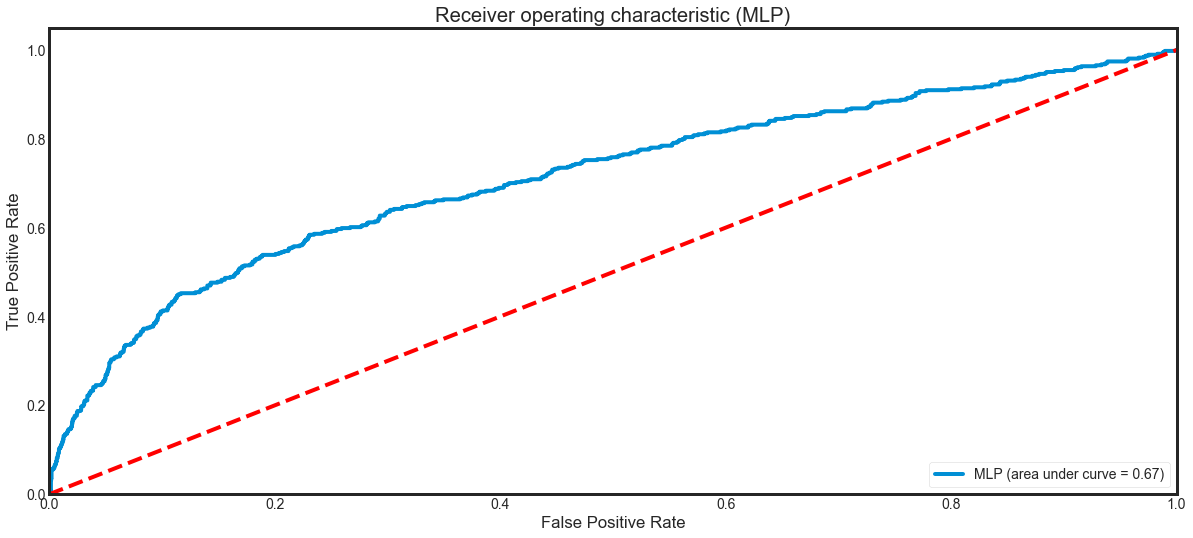

Accuracy Score:  0.7890264627336733
F1-Score:  0.35486265775798076
Recall:  0.5150862068965517
Precision:  0.2706681766704417
[[3011  644]
 [ 225  239]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      3655
           1       0.27      0.52      0.35       464

    accuracy                           0.79      4119
   macro avg       0.60      0.67      0.61      4119
weighted avg       0.86      0.79      0.82      4119



In [309]:
evaluate_model.plot_auc_curve(mlp_model, 'MLP', feature_test, t_te)
evaluate_model.eval_model(t_te, mlp_prediction)

### ${\textbf{Decision Tree}}$

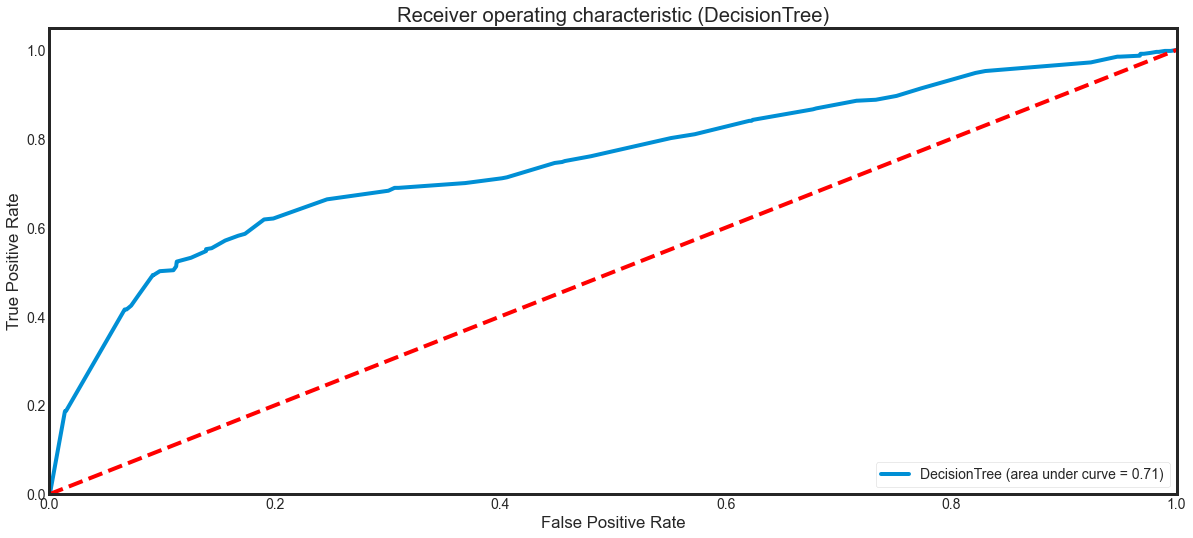

Accuracy Score:  0.7992231124059238
F1-Score:  0.3967906637490882
Recall:  0.5862068965517241
Precision:  0.29988974641675853
[[3020  635]
 [ 192  272]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3655
           1       0.30      0.59      0.40       464

    accuracy                           0.80      4119
   macro avg       0.62      0.71      0.64      4119
weighted avg       0.87      0.80      0.83      4119



In [312]:
evaluate_model.plot_auc_curve(tree_model, 'DecisionTree', feature_test, t_te)
evaluate_model.eval_model(t_te, tree_prediction)

### ${\textbf{Gradient Boosting}}$

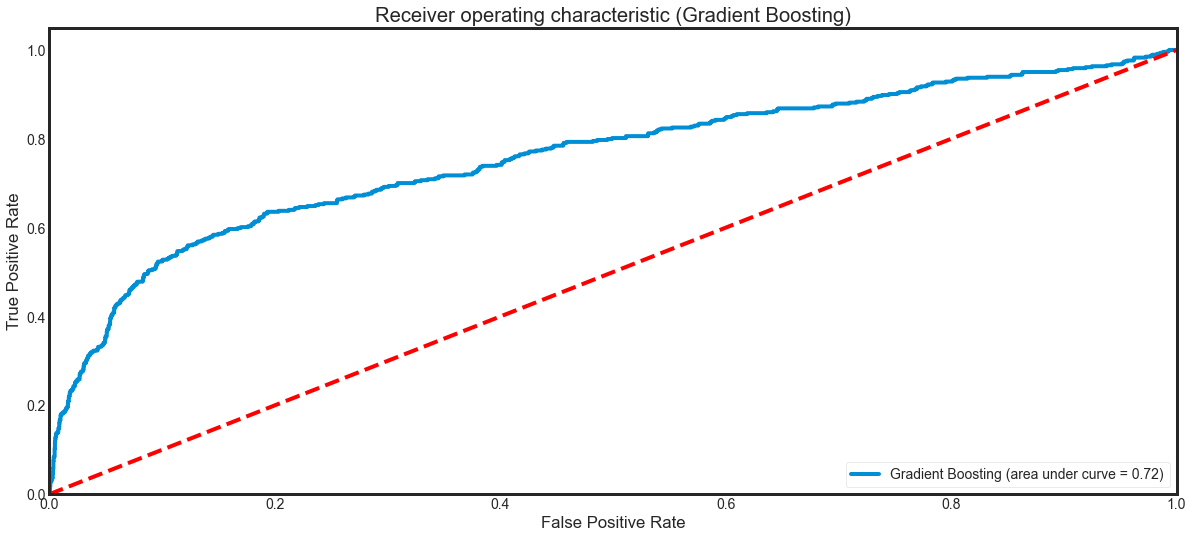

Accuracy Score:  0.8254430687059966
F1-Score:  0.42800318217979316
Recall:  0.5797413793103449
Precision:  0.33921815889029006
[[3131  524]
 [ 195  269]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3655
           1       0.34      0.58      0.43       464

    accuracy                           0.83      4119
   macro avg       0.64      0.72      0.66      4119
weighted avg       0.87      0.83      0.84      4119



In [313]:
evaluate_model.plot_auc_curve(grb_model, 'Gradient Boosting', feature_test, t_te)
evaluate_model.eval_model(t_te, grb_prediction)

**Intepretating Confusion Matrix**


|  | Predicted: No | Predicted Yes |
| --- | --- | --- |
| Actual No |TN: 2871  | FP: 784 |
|  |  |  |
| Actual Yes |FN: 159  | TP: 305 |

1. Correct predictions: $2871$ + $305$ = $3176$

2. Wrong Predictions: $784$ + $159$ = $943$

**True Positive (TP)** These are client in which we predicted Yes (subscrib to a term deposit) and they subscribe to a term deposit

**True Negative (TN)** We predicted no, and they don't subscribe to a term deposit

**False Positive (FP)** We predicted yes, but they don't actually subscribe to a term deposit (Also Known as Type I error)

**False Negative (FN)** We predicted no, but they actually subscribe to a term deposit (Also known as Type II error)

**Accuaracy** Overall, how often is the classifier correct? (TP+TN)/total_observation: ($2871$ + $305$)/$3176$ + $943$ = $0.77$

>> **Which evaluation metric is more appropriate for this project, and why?**

In this case of Business Perspective, High recall is favoured and important than high precision.

Recall is the ability of a classifier to find all positive samples, which means identify all client that will subscribe to a term deposit when they are called. This evaluation metric is right because it will save the company lots of money and time wastage will be curtailed and effort will be directed to only clients that will eventually subscribe for a term deposit.

Hence, it will lead to:
1. Increase in profit
2. Imporve Customer Satisfaction
3. Higher Optimization of Energy and Efforts

>> **Why do certain models perform better than others for the data we have?**

1. Models like **XGBoost** are built with stack of many small fitted trees hence, it learns what it could not with the first tree using the second tree and it continue like that for a preset number of trees and it faster hence the name eXtreme
2. **Logistic Regression** Model did not perform best because it too simple a model for a complex data such as our data. Hidden behaviours were not captured very well in the model
3. **Multilayer perceptron** perform well enough because of it ability to use a nonlinear activation function and uses backpropagation to understand interactions between features. It can distinguish data that is not linearly separable such as our data.
4. **Gradient Boosting** similar to XGBoost learns from ensemble of weak predictive models like decision trees so it performs well when compared to 
5. **Decision Tree** fit a model using a set of predefined rules which sometimes lead to underfitting or overfitting. It is generally considered as a weak learner hence it performance

### ${\textbf{Model Comparison}}$

Trained Models are 
1. Logistic Regression
2. XGBoost Classifier
3. Support Vector Machine
4. Random Forest
5. Multilayer Perceptron
6. Gradient Boosting Classifier

Now let evaluate based on f1-score, recall and auc score

In [321]:
from sklearn.metrics import recall_score, f1_score
models = [xgb_model, log_model, svm_model, random_model, mlp_model, grb_model]
recall_score_list, f1_score_list = [], []
for model in models:
    score = recall_score(t_te, model.predict(feature_test))
    recall_score_list.append(score)
    score = f1_score(t_te, model.predict(feature_test))
    f1_score_list.append(score)

In [336]:
# concat models and score
model_names = ['XGBoost', 'Logistic Regression', 'SVM', 'Random Forest',
               'Multilayer Perceptron', 'Gradient Boosting']
model_score = zip(model_names, recall_score_list, f1_score_list)
model_score = pd.DataFrame(data=model_score, columns=['Model Names', 'Recall Score', 'F1-Score'])
model_score

,Model Names,Recall Score,F1-Score
0,XGBoost,0.588362,0.424242
1,Logistic Regression,0.657328,0.392788
2,SVM,0.612069,0.426747
3,Random Forest,0.493534,0.419414
4,Multilayer Perceptron,0.515086,0.354863
5,Gradient Boosting,0.579741,0.428003


Which Model Performs better in interms of recall score?

In [337]:
model_score.sort_values('Recall Score', ascending=False)

,Model Names,Recall Score,F1-Score
1,Logistic Regression,0.657328,0.392788
2,SVM,0.612069,0.426747
0,XGBoost,0.588362,0.424242
5,Gradient Boosting,0.579741,0.428003
4,Multilayer Perceptron,0.515086,0.354863
3,Random Forest,0.493534,0.419414


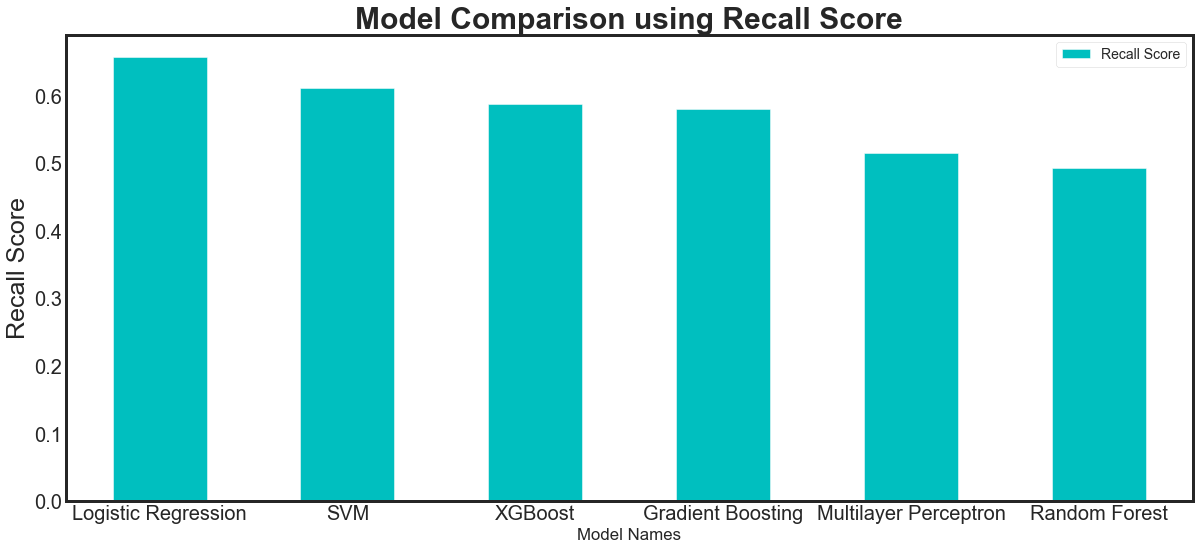

In [340]:
model_score.sort_values('Recall Score', ascending=False).\
            set_index('Model Names')[['Recall Score']].plot(kind='bar', color=['c'])
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Recall Score', fontsize=25)
plt.title('Model Comparison using Recall Score', size=30, fontweight='bold')
plt.show()

In terms of Recall Score Logistic Regression, SVM and XGBoost are the highest performing models

In [327]:
model_score.sort_values('F1-Score', ascending=False)

,Model Names,Recall Score,F1-Score
5,GradientBoosting Classifier,0.579741,0.428003
2,SVM,0.612069,0.426747
0,XGBoost,0.588362,0.424242
3,RandomForest,0.493534,0.419414
1,LogisticRegression,0.657328,0.392788
4,MultilayerPerceptron,0.515086,0.354863


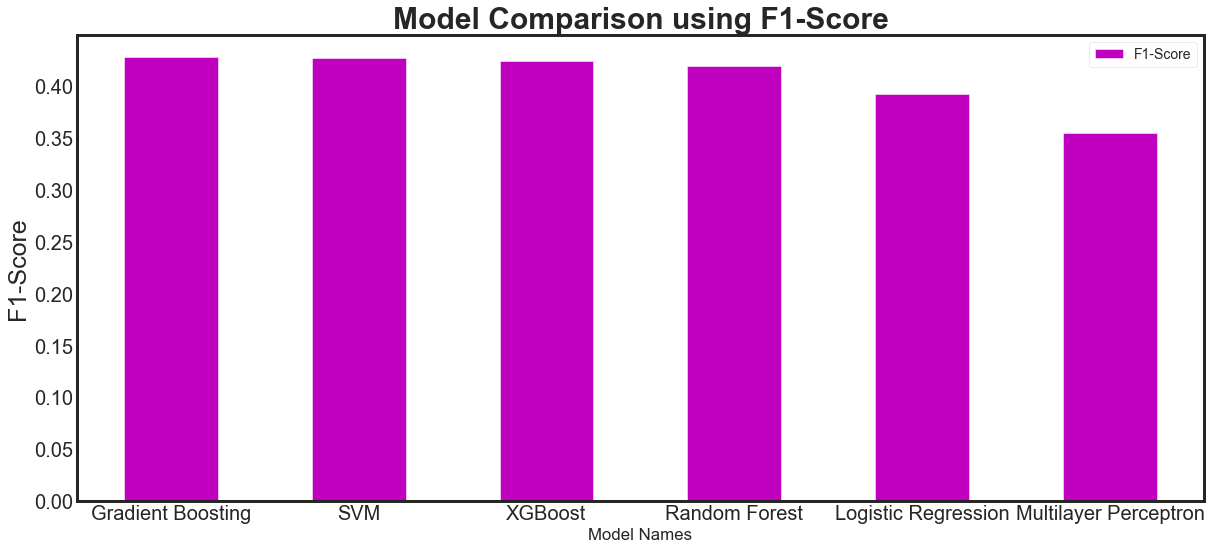

In [342]:
model_score.sort_values('F1-Score', ascending=False).\
            set_index('Model Names')[['F1-Score']].plot(kind='bar', color=['m'])
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('F1-Score', fontsize=25)
plt.title('Model Comparison using F1-Score', size=30, fontweight='bold')
plt.show()

Gradient Boosting, SVM and XGBoost in that other are the best performing models in terms of F1-Score

#### In conclusion, the 3 best Models are ${\textbf{1. Support Vector Machine 2. XGBoost 3. Gradient Boost & Logistic Regression}}$

#### ${\textbf{Main.py}}$ - imports both the pre-processing and model production code and automates model production. 
